In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
# import cv2
import pprint
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

,image,label
0,,1 (uninfected)
1,,1 (uninfected)
2,,0 (parasitized)
3,,1 (uninfected)

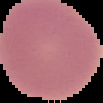
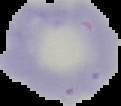
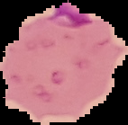
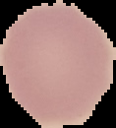

In [3]:
# dataset, info = tfds.load('malaria', split='train', with_info=True)

# tfds.as_dataframe(dataset.take(4), info)
import tensorflow_datasets as tfds

# Load the dataset along with its information
dataset, info = tfds.load(
    'malaria',
    with_info=True,
    as_supervised=True,
    shuffle_files=True,
    split='train'  # Load the entire 'train' split
)
tfds.as_dataframe(dataset.take(4), info)

In [4]:
print(info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='C:\\Users\\Faith\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin 

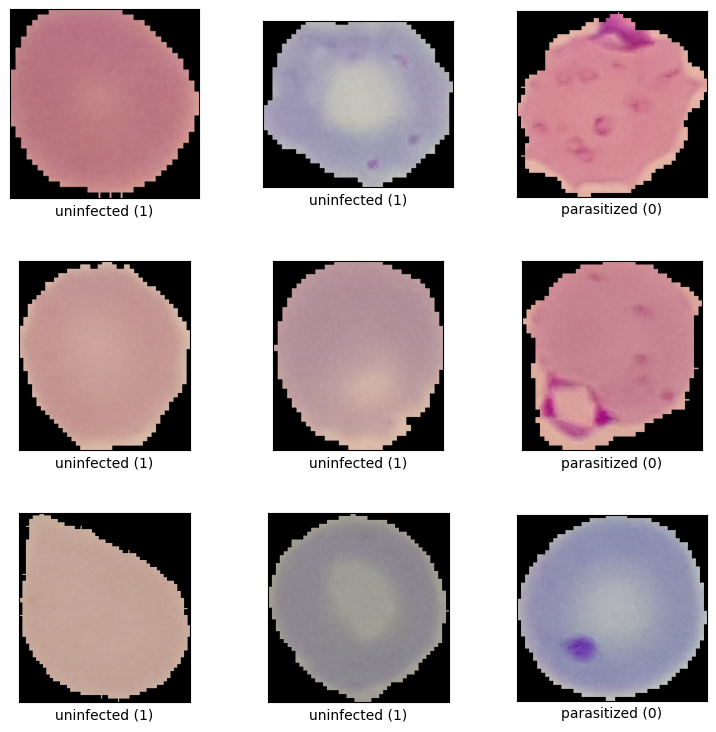

In [5]:
# ds, info = tfds.load('malaria', split='train', with_info=True)

fig = tfds.show_examples(dataset, info)

In [6]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [7]:
# Accessing information about the label feature
print(info.features["label"].num_classes)  # Print the number of classes
print(info.features["label"].names)        # Print the names of the classes

# Correctly converting integer labels to string representations
print(info.features["label"].int2str(0))  # Human readable version (0 -> 'parasitized')
print(info.features["label"].int2str(1))  # Human readable version (1 -> 'uninfected')

# Correctly converting string labels to integer representations
print(info.features["label"].str2int('parasitized'))  # Integer representation ('parasitized' -> 0)
print(info.features["label"].str2int('uninfected'))  # Integer representation ('uninfected' -> 1)



2
['parasitized', 'uninfected']
parasitized
uninfected
0
1


In [8]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].tf_dtype)


{'image': (None, None, 3), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(None, None, 3)
<dtype: 'uint8'>


In [9]:
num_train_examples = info.splits['train'].num_examples
print("Number of images in the 'train' split:", num_train_examples)

Number of images in the 'train' split: 27558


In [10]:
import tensorflow_datasets as tfds

# Load the dataset along with its information
dataset, dataset_info = tfds.load(
    'malaria',
    with_info=True,
    as_supervised=True,
    shuffle_files=True,
    split='train'  # Load the entire 'train' split
)

# Initialize counters for parasitized and uninfected images
num_parasitized = 0
num_uninfected = 0

# Iterate through the dataset and count occurrences of each label
for image, label in dataset:
    if label == 0:  # Assuming '0' represents parasitized and '1' represents uninfected
        num_parasitized += 1
    elif label == 1:
        num_uninfected += 1

# Print the number of parasitized and uninfected images
print("Number of parasitized images:", num_parasitized)
print("Number of uninfected images:", num_uninfected)


Number of parasitized images: 13779
Number of uninfected images: 13779


In [11]:
train_dataset, train_info = tfds.load(
    'malaria',
    split='train',
    with_info=True,
    as_supervised=True
)


In [12]:
import pandas as pd
import tensorflow_datasets as tfds

# Load the malaria dataset along with its information
train_dataset, train_info = tfds.load(
    'malaria',
    split='train[:80%]',
    with_info=True,
    as_supervised=True
)

# Load the remaining part of the training dataset as the test dataset
test_dataset = tfds.load('malaria', split='train[80%:]', as_supervised=True)

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through the train dataset and append images and labels to lists
for image, label in train_dataset:
    images.append(image.numpy())
    labels.append(label.numpy())

# Iterate through the test dataset and append images and labels to lists
for image, label in test_dataset:
    images.append(image.numpy())
    labels.append(label.numpy())

# Convert lists to DataFrame
df = pd.DataFrame({
    'image': images,
    'label': labels
})

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Split the DataFrame into training and testing sets (80-20 split)
train_df = df.iloc[:int(0.8*len(df))]
test_df = df.iloc[int(0.8*len(df)):]

# Print the shape of training and testing sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (22046, 2)
Testing set shape: (5512, 2)


In [13]:
import tensorflow_datasets as tfds

# Load the malaria dataset along with its information
train_dataset, train_info = tfds.load(
    'malaria',
    split='train[:80%]',
    with_info=True,
    as_supervised=True
)

# Load the remaining part of the training dataset as the test dataset
test_dataset = tfds.load('malaria', split='train[80%:]', as_supervised=True)

# Split a portion of the training dataset for validation
val_dataset = train_dataset.take(int(0.2 * len(train_dataset)))
train_dataset = train_dataset.skip(int(0.2 * len(train_dataset)))

# Initialize counters for uninfected and parasitized images
train_uninfected_count = 0
train_parasitized_count = 0
val_uninfected_count = 0
val_parasitized_count = 0
test_uninfected_count = 0
test_parasitized_count = 0

# Iterate through the train dataset and count uninfected and parasitized images
for _, label in train_dataset:
    if label == 0:  # Assuming 0 represents uninfected
        train_uninfected_count += 1
    else:
        train_parasitized_count += 1

# Iterate through the validation dataset and count uninfected and parasitized images
for _, label in val_dataset:
    if label == 0:  # Assuming 0 represents uninfected
        val_uninfected_count += 1
    else:
        val_parasitized_count += 1

# Iterate through the test dataset and count uninfected and parasitized images
for _, label in test_dataset:
    if label == 0:  # Assuming 0 represents uninfected
        test_uninfected_count += 1
    else:
        test_parasitized_count += 1

# Print the counts
print("Train set, Uninfected Images:", train_uninfected_count)
print("Train set, Parasitized Images:", train_parasitized_count)
print("Validation set, Uninfected Images:", val_uninfected_count)
print("Validation set, Parasitized Images:", val_parasitized_count)
print("Test set, Uninfected Images:", test_uninfected_count)
print("Test set, Parasitized Images:", test_parasitized_count)


Train set, Uninfected Images: 8811
Train set, Parasitized Images: 8826
Validation set, Uninfected Images: 2188
Validation set, Parasitized Images: 2221
Test set, Uninfected Images: 2780
Test set, Parasitized Images: 2732


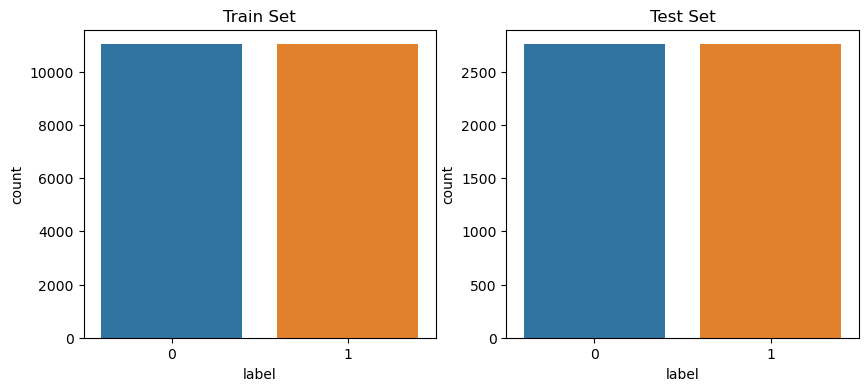

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'class' column represents the labels in your DataFrame train_df
# Replace 'class' with the actual column name containing the labels
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x=train_df['label'], ax=axes[0])
axes[0].set_title('Train Set')
# Repeat the same process for the test set
sns.countplot(x=test_df['label'], ax=axes[1])
axes[1].set_title('Test Set')

plt.show()


The classes are balanced

In [15]:
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [16]:
train_dataset =  train_dataset.map(resize_rescale)
val_dataset =  val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [17]:
for data in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], shape=(115, 136, 3), dtype=uint8) tf.Tensor(0, shape=(), dtype=int64)


Preaparing data for modelling

In [18]:
train_df.columns

Index(['image', 'label'], dtype='object')

In [19]:
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [20]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [21]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [22]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

Model Creation

## CNN 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IM_SIZE, IM_SIZE, 3)))  # Adjust input shape here
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [24]:
results = model.fit(
    train_dataset,
    steps_per_epoch=10,  # 50/311 = ~16% of data (50 steps for each epoch)
    epochs=4,
    validation_data=val_dataset,
    batch_size=BATCH_SIZE
)


Epoch 1/4



10/10 [==============================] - 92s 8s/step - loss: 0.9195 - accuracy: 0.4953 - val_loss: 0.6927 - val_accuracy: 0.5634
Epoch 2/4
10/10 [==============================] - 71s 8s/step - loss: 0.6930 - accuracy: 0.4953 - val_loss: 0.6910 - val_accuracy: 0.5965
Epoch 3/4
10/10 [==============================] - 64s 7s/step - loss: 0.6889 - accuracy: 0.5297 - val_loss: 0.6949 - val_accuracy: 0.4963
Epoch 4/4
10/10 [==============================] - 64s 7s/step - loss: 0.6999 - accuracy: 0.5047 - val_loss: 0.6920 - val_accuracy: 0.5037


       loss  accuracy  val_loss  val_accuracy
0  0.919531  0.495313  0.692708      0.563393
1  0.692953  0.495313  0.691019      0.596507
2  0.688900  0.529688  0.694869      0.496258
3  0.699854  0.504687  0.691976      0.503742

 ----------------------------------------------------------------------------------------------------


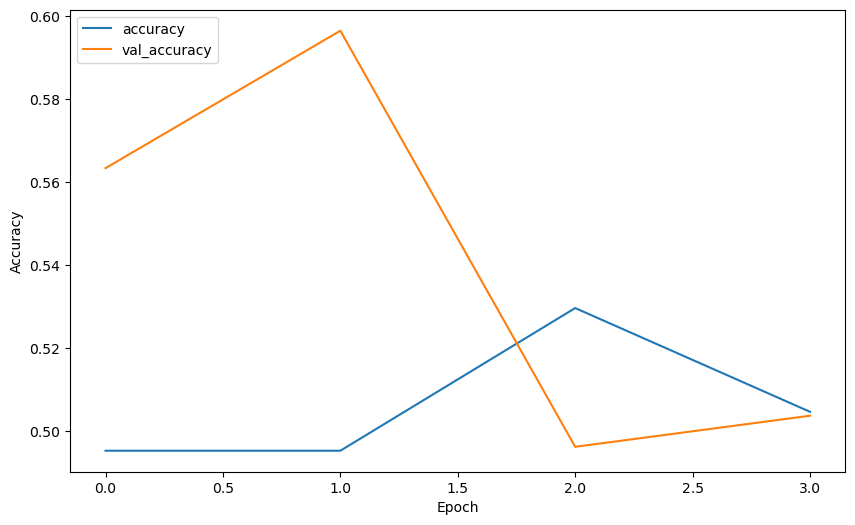

In [25]:
# Model Summary
summary = pd.DataFrame(model.history.history)
print(summary.head())
print('\n','-'*100)

plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

# save the model if you want
# str_time = datetime.datetime.now().strftime("%m-%d %H:%M:%S")
# model_path = '/kaggle/working/' + str_time + 'model.h5'
# model.save(model_path)

In [28]:
test_dataset = test_dataset.batch(1)

In [27]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)

# Print the loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


5512/5512 [==============================] - 120s 22ms/step - loss: 0.6935 - accuracy: 0.4956
Test Loss: 0.6935189366340637
Test Accuracy: 0.4956458508968353
